# KNN
---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import sklearn
sklearn.__version__

'1.1.1'

In [1]:
# 데이터 로드

citrus = pd.read_csv("./Datasets/citrus.csv")

NameError: name 'pd' is not defined

In [4]:
# 지름, 무게, 컬러(rgb) 
citrus

,name,diameter,weight,red,green,blue
0,orange,2.96,86.76,172,85,2
1,orange,3.91,88.05,166,78,3
2,orange,4.42,95.17,156,81,2
3,orange,4.47,95.60,163,81,4
4,orange,4.48,95.76,161,72,9
...,...,...,...,...,...,...
9995,grapefruit,15.35,253.89,149,77,20
9996,grapefruit,15.41,254.67,148,68,7
9997,grapefruit,15.59,256.50,168,82,20
9998,grapefruit,15.92,260.14,142,72,11


In [5]:
citrus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      10000 non-null  object 
 1   diameter  10000 non-null  float64
 2   weight    10000 non-null  float64
 3   red       10000 non-null  int64  
 4   green     10000 non-null  int64  
 5   blue      10000 non-null  int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 468.9+ KB


In [6]:
# 라벨 수 확인
citrus['name'].unique()

array(['orange', 'grapefruit'], dtype=object)

In [7]:
# 중복값 확인

# citrus[citrus.duplicated()]
citrus.duplicated().sum()

0

In [8]:
#  결측치 확인

citrus.isna().sum()

name        0
diameter    0
weight      0
red         0
green       0
blue        0
dtype: int64

In [9]:
citrus['name'].value_counts()

orange        5000
grapefruit    5000
Name: name, dtype: int64

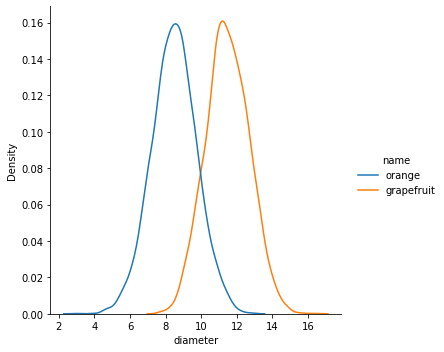

In [10]:
sns.displot(data=citrus, x='diameter', hue='name', kind='kde')

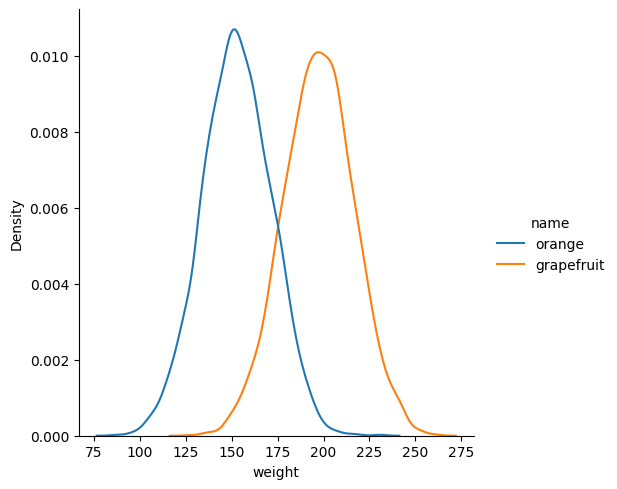

In [11]:
sns.displot(data=citrus, x='weight', hue='name', kind='kde')

# 데이터 전처리

In [12]:
df = citrus.copy()
df.head()

,name,diameter,weight,red,green,blue
0,orange,2.96,86.76,172,85,2
1,orange,3.91,88.05,166,78,3
2,orange,4.42,95.17,156,81,2
3,orange,4.47,95.60,163,81,4
4,orange,4.48,95.76,161,72,9


## 레이블 인코딩

In [13]:
# map을 이용하여 레이블 인코딩

# df['name'] = df['name'].map({'orange' : 1, 'grapefruit' : 0})
# df

In [14]:
# LabelEncoding을 이용하여 레이블 인코딩
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

# encoder.fit(df['name'])
# df['name'] = encoder.transform(df['name'])

df['name'] = encoder.fit_transform(df['name'])
df.head()

,name,diameter,weight,red,green,blue
0,1,2.96,86.76,172,85,2
1,1,3.91,88.05,166,78,3
2,1,4.42,95.17,156,81,2
3,1,4.47,95.60,163,81,4
4,1,4.48,95.76,161,72,9


In [15]:
encoder.classes_

array(['grapefruit', 'orange'], dtype=object)

## 데이터 분리 (학습 / 테스트)

In [16]:
# X, Y 분리

X = df.iloc[:, 1:]
y = df.iloc[:, 0]

In [17]:
# 셔플

# X , y = sklearn.utils.shuffle(X, y)

In [18]:
# # 학습 / 테스트 데이터 분리(80 : 20)

# idx = int(df.shape[0] * 0.8)


# X_train = X.iloc[:idx , :]
# X_test = X.iloc[idx: , :]

# y_train = y[:idx]
# y_test = y[idx:]

In [19]:
# 학습 / 테스트 데이터 분리(80 : 20)

from sklearn.model_selection import train_test_split

# stratify = 골고루 섞음
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2022, stratify=y, shuffle=True)

In [20]:
y_train.value_counts()

1    4000
0    4000
Name: name, dtype: int64

In [21]:
y_test.value_counts()

1    1000
0    1000
Name: name, dtype: int64

In [22]:
X_train.shape

(8000, 5)

## 스케일링

* 표준화

In [23]:
# m = X_train['diameter'].mean()   # 평균
# s = X_train['diameter'].std()   # 표준편차

# z = (X_train['diameter'] - m) / s

In [24]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(X_train)
X_train_scaled = ss.transform(X_train)

X_train_scaled[:5]

array([[-1.61852607, -1.60693378,  0.48456216,  1.45730586, -0.92140149],
       [-0.59932084, -0.75195291, -1.42739703, -1.02134167, -0.81169288],
       [-1.31122801, -1.31556395,  0.00657236,  0.00430558,  0.39510185],
       [ 0.35330314,  0.32573973,  1.15374787,  1.02995284,  0.8339363 ],
       [-2.12044623, -2.05508996, -0.18462356,  0.68807042,  0.61451907]])

In [25]:
X_test_scaled = ss.transform(X_test)
X_test_scaled

array([[-0.45079345, -0.43701389,  3.25690297,  0.17524679, -0.81169288],
       [-0.04618434, -0.08176814,  0.3889642 , -0.08116502, -0.48256704],
       [ 0.50695217,  0.50062995, -0.0890256 ,  0.4316586 ,  0.61451907],
       ...,
       [-0.7427266 , -0.74546284,  0.19776828,  1.45730586, -0.59227565],
       [-0.25104971, -0.23138125, -0.0890256 ,  0.60259981, -1.0311101 ],
       [-0.82467275, -0.8260763 , -0.75821131, -0.08116502, -0.48256704]])

In [26]:
y_train = y_train.to_numpy()
# y_train = y_train.values

y_train

array([1, 0, 1, ..., 0, 0, 0])

## 모델 학습

In [27]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train_scaled, y_train)

KNeighborsClassifier()

## 테스트

In [28]:
y_pred = clf.predict(X_test_scaled)
y_pred

array([1, 0, 0, ..., 1, 1, 1])

In [29]:
# 맞춘 갯수

(y_pred == y_test).sum()

1841

In [30]:
#정확도

(y_pred == y_test).sum()/X_test.shape[0]

0.9205

## 평가

In [31]:
from sklearn.metrics import confusion_matrix

cfm = confusion_matrix(y_test, y_pred)
cfm

array([[915,  85],
       [ 74, 926]], dtype=int64)

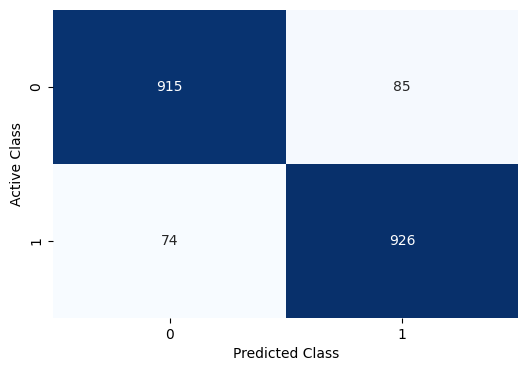

In [32]:
plt.figure(figsize=(6, 4))
sns.heatmap(cfm, annot=True, fmt='g', cbar=False, cmap='Blues')
plt.ylabel("Active Class")
plt.xlabel("Predicted Class")
plt.show()

In [33]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

def print_score(y_test, y_pred):
    print(f'정확도 : {accuracy_score(y_test, y_pred)}')
    print(f'정밀도 : {precision_score(y_test, y_pred)}') 
    print(f'재현율 : {recall_score(y_test, y_pred)}') 

print_score(y_test, y_pred)

정확도 : 0.9205
정밀도 : 0.9159248269040554
재현율 : 0.926


In [ ]:
acc_scores = []
k = []
for k in range(3, 50):
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(X_train_scaled, y_train)
    y_pred = clf.predict(X_test_scaled)
    
    acc_scores.append(accuracy_score(y_test, y_pred))
    
acc_scores

[0.9175,
 0.919,
 0.9205,
 0.921,
 0.9245,
 0.9235,
 0.926,
 0.926,
 0.925,
 0.924,
 0.922,
 0.9225,
 0.9225,
 0.9225,
 0.9245,
 0.9255,
 0.924,
 0.926,
 0.923,
 0.9245,
 0.9275,
 0.9265,
 0.929,
 0.929,
 0.93,
 0.931,
 0.93,
 0.93,
 0.9285,
 0.93,
 0.928,
 0.9305,
 0.9295,
 0.9295,
 0.93,
 0.9295,
 0.9285,
 0.93,
 0.929,
 0.93,
 0.9285,
 0.9285,
 0.9275,
 0.9285,
 0.928,
 0.928,
 0.928]

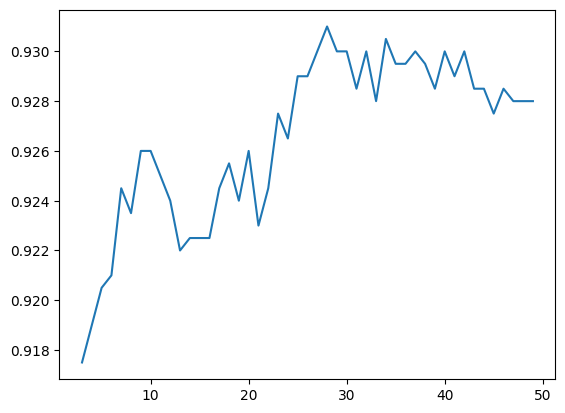

In [45]:
sns.lineplot( x=range(3,50), y=acc_scores)
plt.show()

In [53]:
tmp = max(acc_scores)
index = acc_scores.index(tmp)
index+3

28

In [56]:
np.argmax(acc_scores) + 3

28

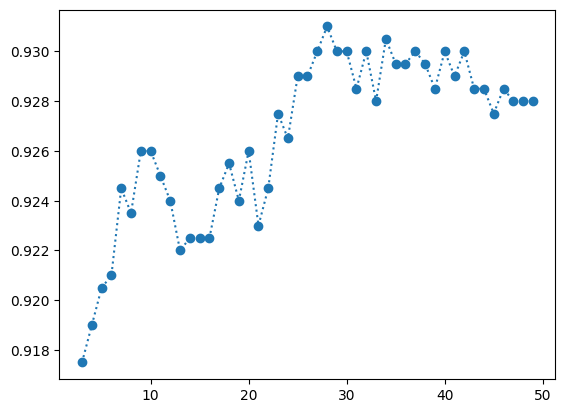

In [57]:
plt.plot(range(3,50), acc_scores, 'o:')
plt.show()

## 교차 검증 (K-Fold)

In [70]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, shuffle=True, random_state=2022)

k_scores = []

for k in range(3, 50):
    acc_scores = []
    for train_idx, val_idx in kf.split(X_train_scaled):
        train_x, val_x = X_train_scaled[train_idx], X_train_scaled[val_idx]
        train_y, vak_y = y_train[train_idx], y_train[val_idx]

        # 학습
        model =KNeighborsClassifier(n_neighbors=k)
        model.fit(train_x, train_y)
        y_pred = clf.predict(val_x)

        acc_scores.append(accuracy_score(vak_y, y_pred))
    k_scores.append(np.array(acc_scores).mean())
        
np.argmax(k_scores) + 3

3

### cross_val_score을 이용한 교차 검증 방법

In [78]:
from sklearn.model_selection import cross_val_score
from tqdm import tqdm

hist = []

for k in tqdm(range(3, 50)):
    model = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='accuracy')
    
    hist.append(scores.mean())


100%|██████████████████████████████████████████████████████████████████████████████████| 47/47 [00:11<00:00,  4.12it/s]


In [79]:
hist

[0.909,
 0.9112500000000001,
 0.915,
 0.9164999999999999,
 0.9176249999999999,
 0.9190000000000002,
 0.91975,
 0.9200000000000002,
 0.9212499999999999,
 0.9205,
 0.91975,
 0.9203749999999999,
 0.9217500000000001,
 0.9215,
 0.9233750000000001,
 0.92325,
 0.9231250000000001,
 0.924,
 0.924,
 0.92425,
 0.9243749999999998,
 0.9247500000000001,
 0.9253750000000001,
 0.925,
 0.9256249999999999,
 0.9250000000000002,
 0.9248750000000001,
 0.9257499999999999,
 0.926375,
 0.9251249999999999,
 0.9255000000000001,
 0.9245000000000001,
 0.9257500000000001,
 0.926375,
 0.926375,
 0.9261250000000001,
 0.9259999999999999,
 0.9253750000000001,
 0.9262500000000001,
 0.92675,
 0.9259999999999999,
 0.9265000000000001,
 0.9265000000000001,
 0.925,
 0.9253750000000001,
 0.9255000000000001,
 0.9259999999999999]